# Customer Segmentation

### using K-means based on RFM score

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2018 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2018 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2018 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2018 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2018 8:26,3.39,17850.0,United Kingdom


In [3]:
df.shape

(541909, 8)

### Reducing Data

In [4]:
df.isna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False


In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
df_reduced = df[['Country','CustomerID']].drop_duplicates()
df_reduced.head()

,Country,CustomerID
0,United Kingdom,17850.0
9,United Kingdom,13047.0
26,France,12583.0
46,United Kingdom,13748.0
65,United Kingdom,15100.0


In [7]:
df_reduced.describe()

,CustomerID
count,4380.000000
mean,15294.421461
std,1725.199601
min,12346.000000
25%,13806.750000
50%,15296.500000
75%,16776.250000
max,18287.000000


In [8]:
df_reduced = df_reduced.groupby(['Country'])

In [9]:
df_reduced.head()

,Country,CustomerID
0,United Kingdom,17850.0
9,United Kingdom,13047.0
26,France,12583.0
46,United Kingdom,13748.0
65,United Kingdom,15100.0
...,...,...
389350,USA,12607.0
395472,RSA,12446.0
411304,USA,12646.0
519634,USA,12558.0


In [10]:
df_reduced.aggregate('count').reset_index().sort_values('CustomerID',ascending=False)

,Country,CustomerID
36,United Kingdom,3950
14,Germany,95
13,France,87
31,Spain,31
3,Belgium,25
33,Switzerland,21
27,Portugal,19
19,Italy,15
12,Finland,12
1,Austria,11


In [11]:
# A large no of Unigue individuals are from UK. So lets work for UK data....

In [12]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2018 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2018 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2018 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2018 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2018 8:26,3.39,17850.0,United Kingdom


In [13]:
df = df.query("Country == 'United Kingdom'")
df.describe()

,Quantity,UnitPrice,CustomerID
count,495478.000000,495478.000000,361878.000000
mean,8.605486,4.532422,15547.871368
std,227.588756,99.315438,1594.402590
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,14194.000000
50%,3.000000,2.100000,15514.000000
75%,10.000000,4.130000,16931.000000
max,80995.000000,38970.000000,18287.000000


In [14]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,12/9/2019 12:31,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,12/9/2019 12:49,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,12/9/2019 12:49,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,12/9/2019 12:49,8.95,13113.0,United Kingdom
541893,581586,20685,DOORMAT RED RETROSPOT,10,12/9/2019 12:49,7.08,13113.0,United Kingdom


## Cleaning and Creation of Data

In [15]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

In [16]:
# the description column is unnecessary for the model
del df["Description"]

In [17]:
df.dropna(inplace=True)

In [18]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [19]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,361878.000000,361878.000000,361878.000000
mean,11.077029,3.256007,15547.871368
std,263.129266,70.654731,1594.402590
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15514.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,38970.000000,18287.000000


In [20]:
# here we see minm value of quantity is -ve, we will select data with +ve quantity
df = df[df["Quantity"] > 0]
df.describe()

,Quantity,UnitPrice,CustomerID
count,354345.000000,354345.000000,354345.000000
mean,12.048913,2.963793,15552.436219
std,190.428127,17.862067,1594.546025
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15522.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,8142.750000,18287.000000


In [21]:
# date to be converted into proper format
df.loc[:,"InvoiceDate"] = pd.to_datetime(df.loc[:,"InvoiceDate"])
df = df.reset_index()
print(df["InvoiceDate"])

0        2018-12-01 08:26:00
1        2018-12-01 08:26:00
2        2018-12-01 08:26:00
3        2018-12-01 08:26:00
4        2018-12-01 08:26:00
                 ...        
354340   2019-12-09 12:31:00
354341   2019-12-09 12:49:00
354342   2019-12-09 12:49:00
354343   2019-12-09 12:49:00
354344   2019-12-09 12:49:00
Name: InvoiceDate, Length: 354345, dtype: datetime64[ns]


In [22]:
df["TotalAmount"] = df.loc[:,"Quantity"] * df.loc[:,"UnitPrice"]
df.head()

,index,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,0,536365,85123A,6,2018-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,1,536365,71053,6,2018-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,2,536365,84406B,8,2018-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,3,536365,84029G,6,2018-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,4,536365,84029E,6,2018-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


# Calculating RFM - Recency Frequency and Monetary 

In [23]:
import datetime as dt
#Last date for purchase was 2019-12-09 12:49:00
Latest = dt.datetime(2019,12,10)

#Create RFM Modelling scores for each customer
RFMScores = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest- x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
RFMScores['InvoiceDate'] = RFMScores['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
RFMScores.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

RFMScores.reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4596,33719.73
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34
5,12821.0,214,6,92.72
6,12822.0,70,46,948.88
7,12823.0,74,5,1759.50
8,12824.0,59,25,397.12
9,12826.0,2,91,1474.72


In [24]:
RFMScores.describe()

,Recency,Frequency,Monetary
count,3921.000000,3921.000000,3921.000000
mean,91.722265,90.371079,1863.910113
std,99.528532,217.796155,7481.922217
min,0.000000,1.000000,0.000000
25%,17.000000,17.000000,300.040000
50%,50.000000,41.000000,651.820000
75%,142.000000,99.000000,1575.890000
max,373.000000,7847.000000,259657.300000


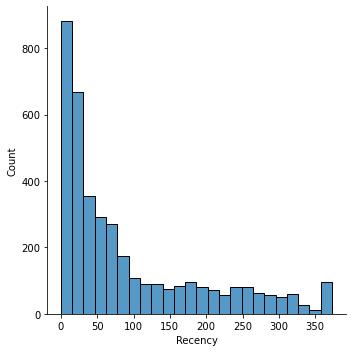

In [25]:
sns.displot(RFMScores["Recency"])

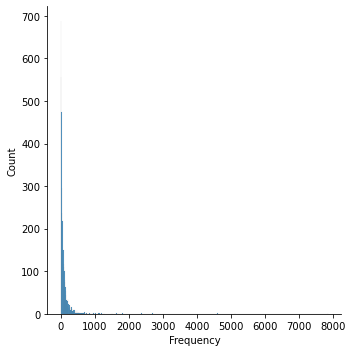

In [26]:
sns.displot(RFMScores["Frequency"])

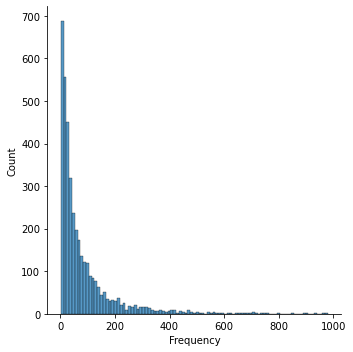

In [27]:
x = RFMScores.query("Frequency < 1000")['Frequency']
sns.displot(x)

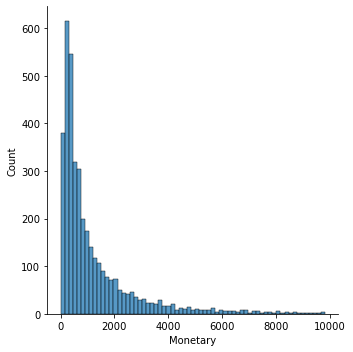

In [28]:
x = RFMScores.query("Monetary < 10000")['Monetary']
sns.displot(x)

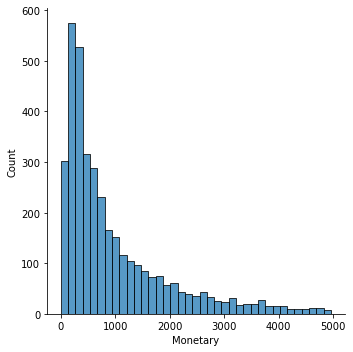

In [29]:
x = RFMScores.query("Monetary < 5000")['Monetary']
sns.displot(x)

In [30]:
quantiles = RFMScores.quantile(q=[0.25,0.50,0.75])
quantiles = dict(quantiles)

In [31]:
print(quantiles)

{'Recency': 0.25     17.0
0.50     50.0
0.75    142.0
Name: Recency, dtype: float64, 'Frequency': 0.25    17.0
0.50    41.0
0.75    99.0
Name: Frequency, dtype: float64, 'Monetary': 0.25     300.04
0.50     651.82
0.75    1575.89
Name: Monetary, dtype: float64}


#### scores for recency frequency and monetary 
#### for recency 1 will be highest representing most recent customer
#### for freq and monetary 4 will be highest

In [32]:
RFMScores.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34


In [33]:
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [34]:
RFMScores['R'] = RFMScores['Recency'].apply(RScoring, args=('Recency',quantiles,))
RFMScores['F'] = RFMScores['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
RFMScores['M'] = RFMScores['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12747.0,2,103,4196.01,1,1,1
12748.0,0,4596,33719.73,1,1,1
12749.0,3,199,4090.88,1,1,1
12820.0,3,59,942.34,1,2,2


In [35]:
RFMScores['RFMGroup'] = RFMScores.R.map(str) + RFMScores.F.map(str) + RFMScores.M.map(str)
RFMScores['RFMScore'] = RFMScores[['R', 'F', 'M']].sum(axis = 1)

RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12747.0,2,103,4196.01,1,1,1,111,3
12748.0,0,4596,33719.73,1,1,1,111,3
12749.0,3,199,4090.88,1,1,1,111,3
12820.0,3,59,942.34,1,2,2,122,5


In [36]:
Loyalty_Level = ['Platinum', 'Gold', 'Silver', 'Bronze']
Score_cuts = pd.qcut(RFMScores.RFMScore, q = 4, labels = Loyalty_Level)
RFMScores['RFM_Loyalty_Level'] = Score_cuts.values
RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,12346.0,325,1,77183.60,4,4,1,441,9,Silver
1,12747.0,2,103,4196.01,1,1,1,111,3,Platinum
2,12748.0,0,4596,33719.73,1,1,1,111,3,Platinum
3,12749.0,3,199,4090.88,1,1,1,111,3,Platinum
4,12820.0,3,59,942.34,1,2,2,122,5,Platinum


In [37]:
RFMScores[RFMScores['RFMGroup']=='111'].sort_values('Monetary', ascending=False).reset_index().head(10) 

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,18102.0,0,431,259657.30,1,1,1,111,3,Platinum
1,17450.0,8,337,194550.79,1,1,1,111,3,Platinum
2,17511.0,2,963,91062.38,1,1,1,111,3,Platinum
3,16684.0,4,277,66653.56,1,1,1,111,3,Platinum
4,14096.0,4,5111,65164.79,1,1,1,111,3,Platinum
5,13694.0,3,568,65039.62,1,1,1,111,3,Platinum
6,15311.0,0,2379,60767.90,1,1,1,111,3,Platinum
7,13089.0,2,1818,58825.83,1,1,1,111,3,Platinum
8,15769.0,7,130,56252.72,1,1,1,111,3,Platinum
9,15061.0,3,403,54534.14,1,1,1,111,3,Platinum


# K-Means Model

In [38]:
# transforming data to near same scale
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num

RFMScores['Recency'] = [handle_neg_n_zero(x) for x in RFMScores.Recency]
RFMScores['Monetary'] = [handle_neg_n_zero(x) for x in RFMScores.Monetary]

Log_Tfd_Data = RFMScores[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

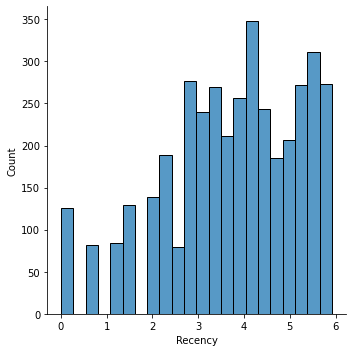

In [39]:
Recency_Plot = Log_Tfd_Data['Recency']
ax = sns.displot(Recency_Plot)

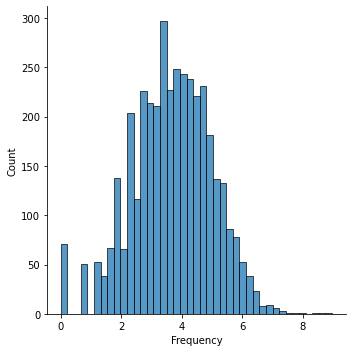

In [40]:
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
ax = sns.displot(Frequency_Plot)

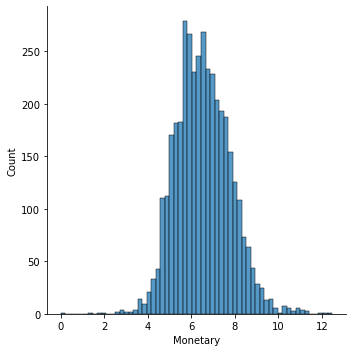

In [41]:
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
ax = sns.displot(Monetary_Plot)

In [42]:
from sklearn.preprocessing import StandardScaler

scaleobj = StandardScaler()
Scaled_Data = scaleobj.fit_transform(Log_Tfd_Data)

Scaled_Data = pd.DataFrame(Scaled_Data, index = RFMScores.index, columns = Log_Tfd_Data.columns)

### Finding k

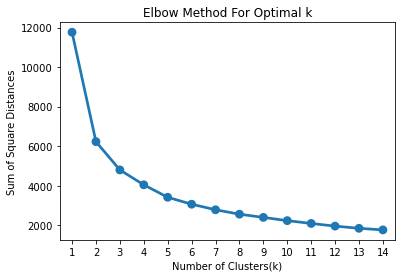

In [43]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(Scaled_Data)
    sum_of_sq_dist[k] = km.inertia_
    
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [44]:
KMean_clust = KMeans(n_clusters= 4, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(Scaled_Data)

RFMScores['Cluster'] = KMean_clust.labels_
RFMScores.head(20)

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster
CustomerID,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,Silver,3
12747.0,2,103,4196.01,1,1,1,111,3,Platinum,1
12748.0,1,4596,33719.73,1,1,1,111,3,Platinum,1
12749.0,3,199,4090.88,1,1,1,111,3,Platinum,1
12820.0,3,59,942.34,1,2,2,122,5,Platinum,1
12821.0,214,6,92.72,4,4,4,444,12,Bronze,2
12822.0,70,46,948.88,3,2,2,322,7,Gold,3
12823.0,74,5,1759.50,3,4,1,341,8,Gold,2
12824.0,59,25,397.12,3,3,3,333,9,Silver,0


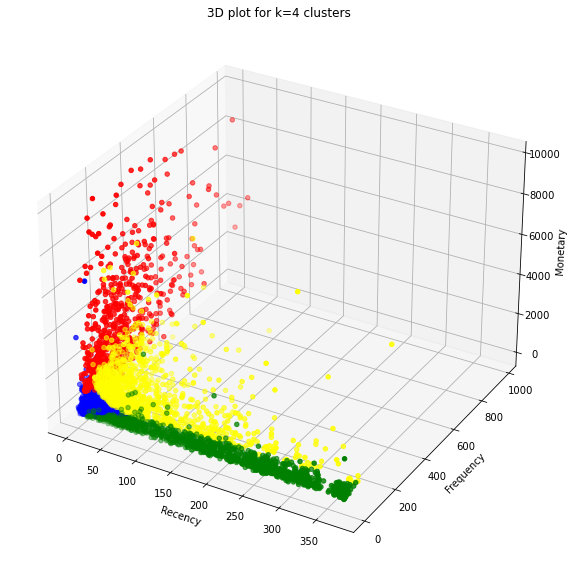

In [45]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

xM = RFMScores.query("Monetary < 10000").query("Frequency < 1000")['Monetary']
xF = RFMScores.query("Monetary < 10000").query("Frequency < 1000")['Frequency']
xR = RFMScores.query("Monetary < 10000").query("Frequency < 1000")['Recency']

ax.scatter(xR[RFMScores.Cluster == 0],xF[RFMScores.Cluster == 0],xM[RFMScores.Cluster == 0], c = "blue")
ax.scatter(xR[RFMScores.Cluster == 1],xF[RFMScores.Cluster == 1],xM[RFMScores.Cluster == 1], c = "red")
ax.scatter(xR[RFMScores.Cluster == 2],xF[RFMScores.Cluster == 2],xM[RFMScores.Cluster == 2], c = "green")
ax.scatter(xR[RFMScores.Cluster == 3],xF[RFMScores.Cluster == 3],xM[RFMScores.Cluster == 3], c = "yellow")

plt.xlabel("Recency")
plt.ylabel("Frequency")
ax.set_zlabel('Monetary')
plt.title("3D plot for k=4 clusters")
plt.show()

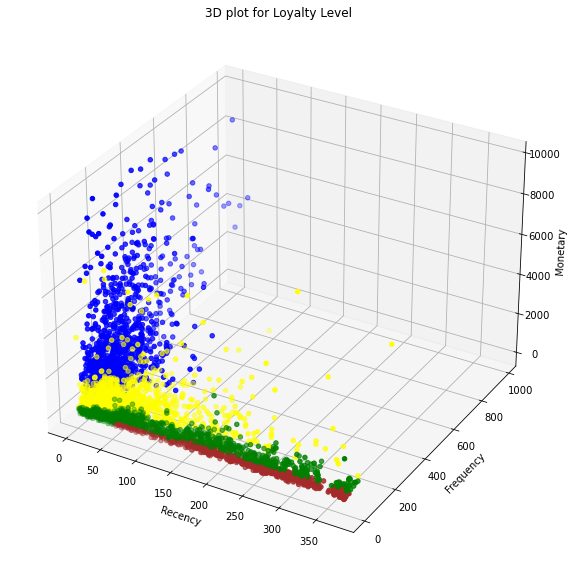

In [46]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

xM = RFMScores.query("Monetary < 10000").query("Frequency < 1000")['Monetary']
xF = RFMScores.query("Monetary < 10000").query("Frequency < 1000")['Frequency']
xR = RFMScores.query("Monetary < 10000").query("Frequency < 1000")['Recency']

ax.scatter(xR[RFMScores.RFM_Loyalty_Level == "Platinum"],xF[RFMScores.RFM_Loyalty_Level == "Platinum"],xM[RFMScores.RFM_Loyalty_Level == "Platinum"], c = "blue")
ax.scatter(xR[RFMScores.RFM_Loyalty_Level == "Gold"],xF[RFMScores.RFM_Loyalty_Level == "Gold"],xM[RFMScores.RFM_Loyalty_Level == "Gold"], c = "yellow")
ax.scatter(xR[RFMScores.RFM_Loyalty_Level == "Silver"],xF[RFMScores.RFM_Loyalty_Level == "Silver"],xM[RFMScores.RFM_Loyalty_Level == "Silver"], c = "green")
ax.scatter(xR[RFMScores.RFM_Loyalty_Level == "Bronze"],xF[RFMScores.RFM_Loyalty_Level == "Bronze"],xM[RFMScores.RFM_Loyalty_Level == "Bronze"], c = "brown")


plt.xlabel("Recency")
plt.ylabel("Frequency")
ax.set_zlabel('Monetary')
plt.title("3D plot for Loyalty Level")
plt.show()